In [9]:
import shap
import joblib
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load XGBoost model & data 
print("\n Loading XGBoost model and data...")
df = pd.read_csv("../data/qqq_supervised.csv", index_col=0, parse_dates=True)
feature_cols = [col for col in df.columns if col != 'Target' and not col.endswith("Return")]
X = df[feature_cols]
y = df['Target']

scaler = joblib.load("../models/day7_xgb_scaler.pkl")
X_scaled = scaler.transform(X)
model = XGBClassifier()
model.load_model("../models/day7_xgb_multi_etf_classifier.json")


 Loading XGBoost model and data...


In [11]:
# SHAP for XGBoost 
print("\n Generating SHAP values for XGBoost...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled)


 Generating SHAP values for XGBoost...


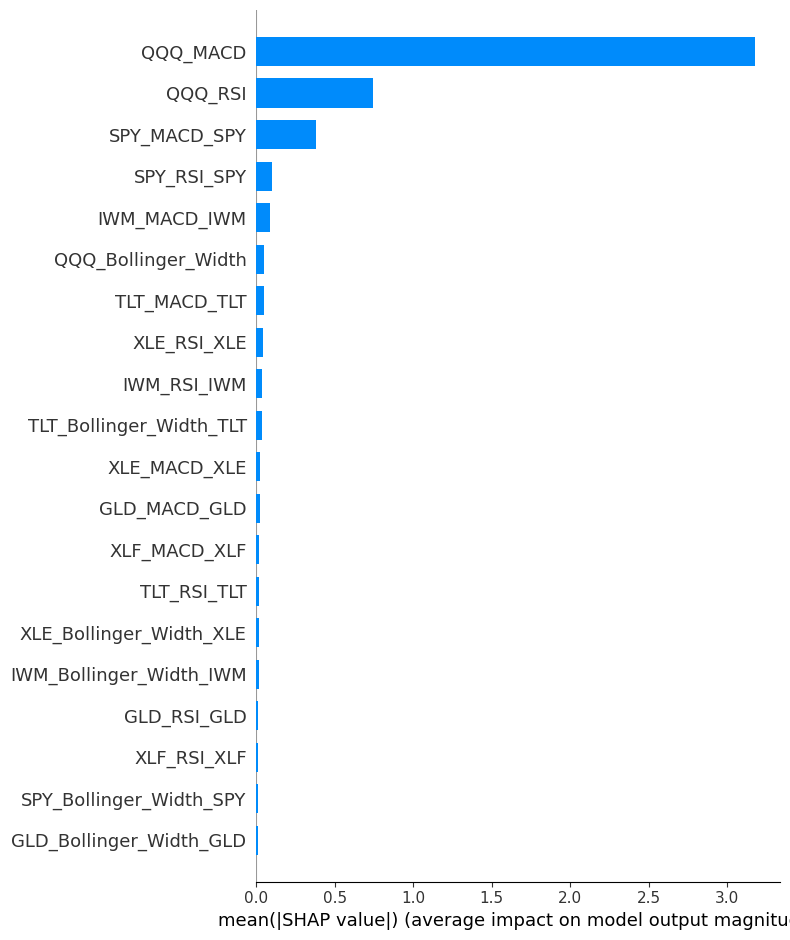

In [12]:
# Global feature importance (bar plot)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("../figures/day10_xgb_shap_summary_bar.png", dpi=300)
plt.show()

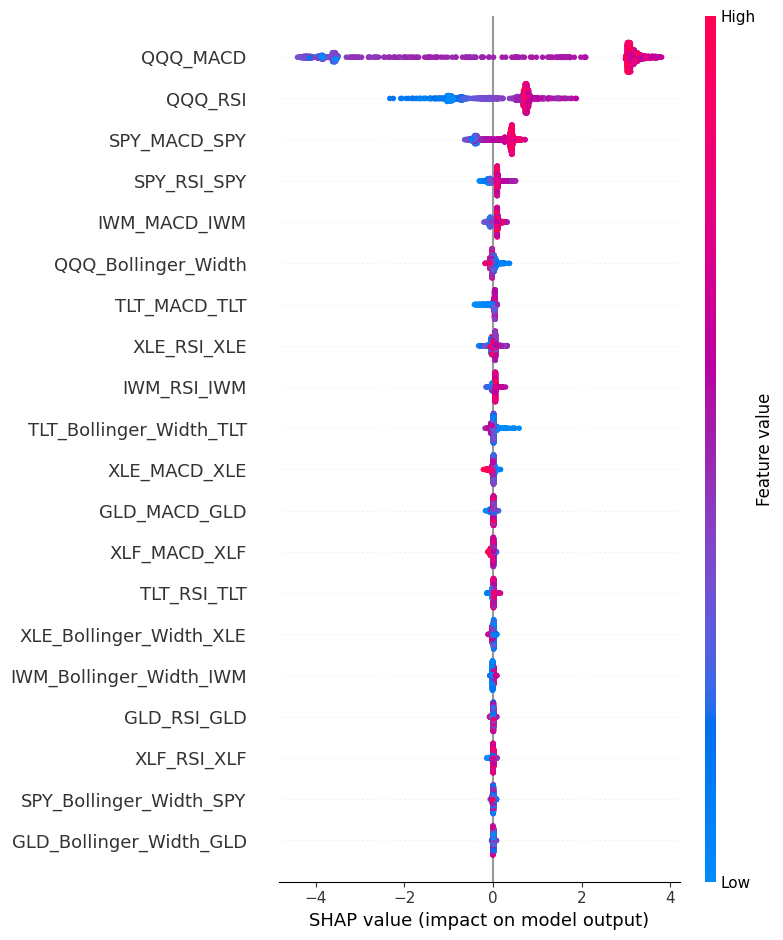

In [13]:
# Beeswarm plot
shap.summary_plot(shap_values, X, show=False)
plt.tight_layout()
plt.savefig("../figures/day10_xgb_shap_beeswarm.png", dpi=300)
plt.show()

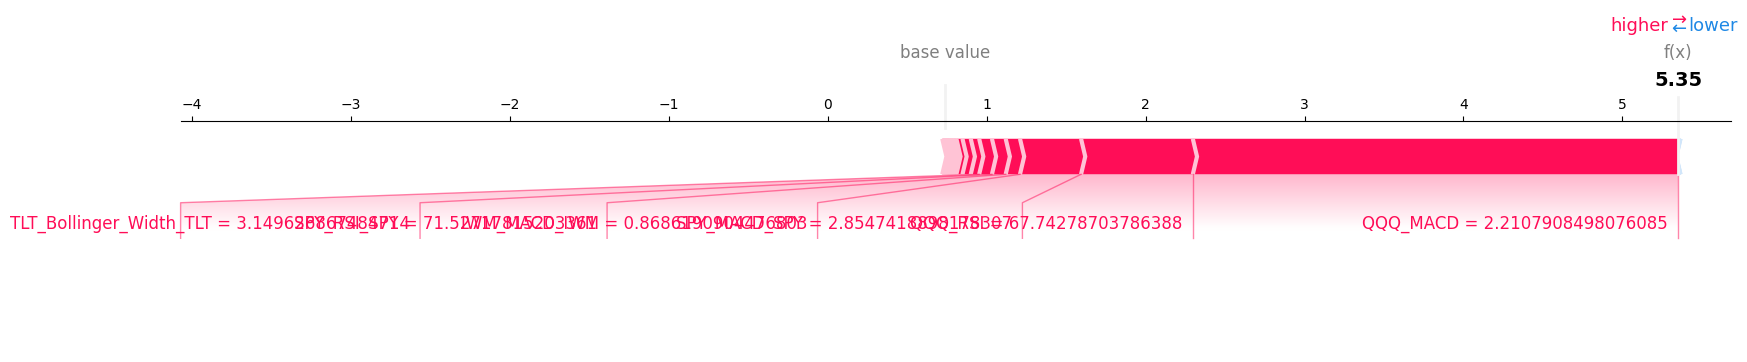

In [14]:
# Force plot for one instance
shap.initjs()
i = 100
force_plot = shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i], matplotlib=True)
plt.savefig("../figures/day10_xgb_shap_force_plot.png", dpi=300)
plt.close()

In [15]:
# SHAP for LSTM — Not directly supported 
# Skipping LSTM SHAP due to incompatibility (requires DeepSHAP or captum, not included in this pipeline)
print("\n SHAP for LSTM skipped — tree-based SHAP doesn't support PyTorch models directly.")


 SHAP for LSTM skipped — tree-based SHAP doesn't support PyTorch models directly.


In [16]:
# Export Top Features 
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = pd.DataFrame({"Feature": X.columns, "Mean SHAP": mean_abs_shap})
top_features = top_features.sort_values("Mean SHAP", ascending=False)
top_features.to_csv("../figures/day10_xgb_top_shap_features.csv", index=False)

print("\n SHAP analysis for XGBoost completed and visuals saved.")


 SHAP analysis for XGBoost completed and visuals saved.
